# TP 2

## Exercice 2.1

matplotlib can be used to plot graphs. Given below is a very simple code with only x values. After importing the matplotlib library, we initialize x values and plot it.

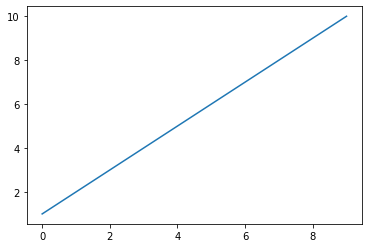

In [2]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()

Now let's change the color, style and width of the line.

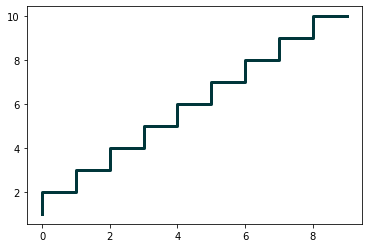

In [3]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

We will now initialize the y-values and plot the graph.

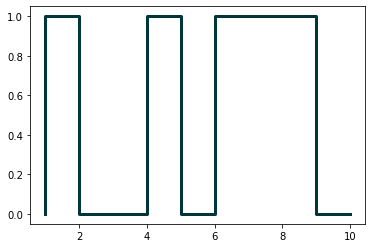

In [4]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

In the first practical session, we saw how to parse JSON files. Continuing with the same JSON file, we will now plot the results of number of programming languages released per year. Verify the output.

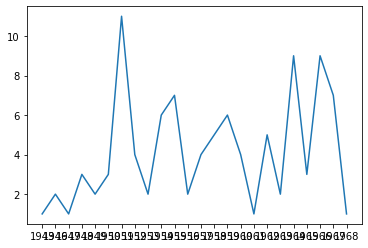

In [8]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.show()

Following program will add title and labels to the x-axis and y-axis.

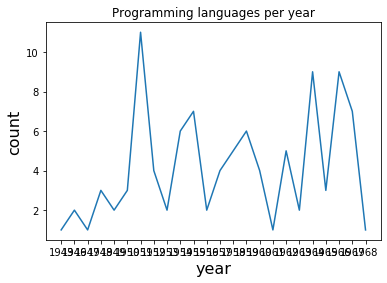

In [10]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel('year', fontsize=16)
plot.ylabel('count', fontsize=16)
plot.show()

There is yet another way to plot the dataframes, by using pandas.DataFrame.plot.

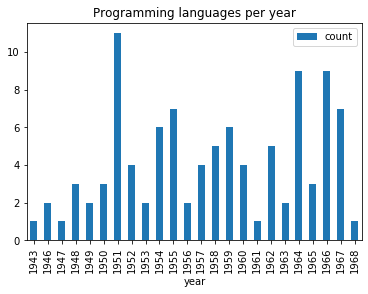

In [12]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)

grouped = dataframe.groupby('year').count()
grouped = grouped.rename(columns={'languageLabel':'count'}).reset_index()

grouped.plot(x=0, kind='bar', title="Programming languages per year")

Now, we want to create multiple subplots. A simple way is given below. Recall in first practical session, we did group by on multiple columns. Subplots can be used to visualize these data.

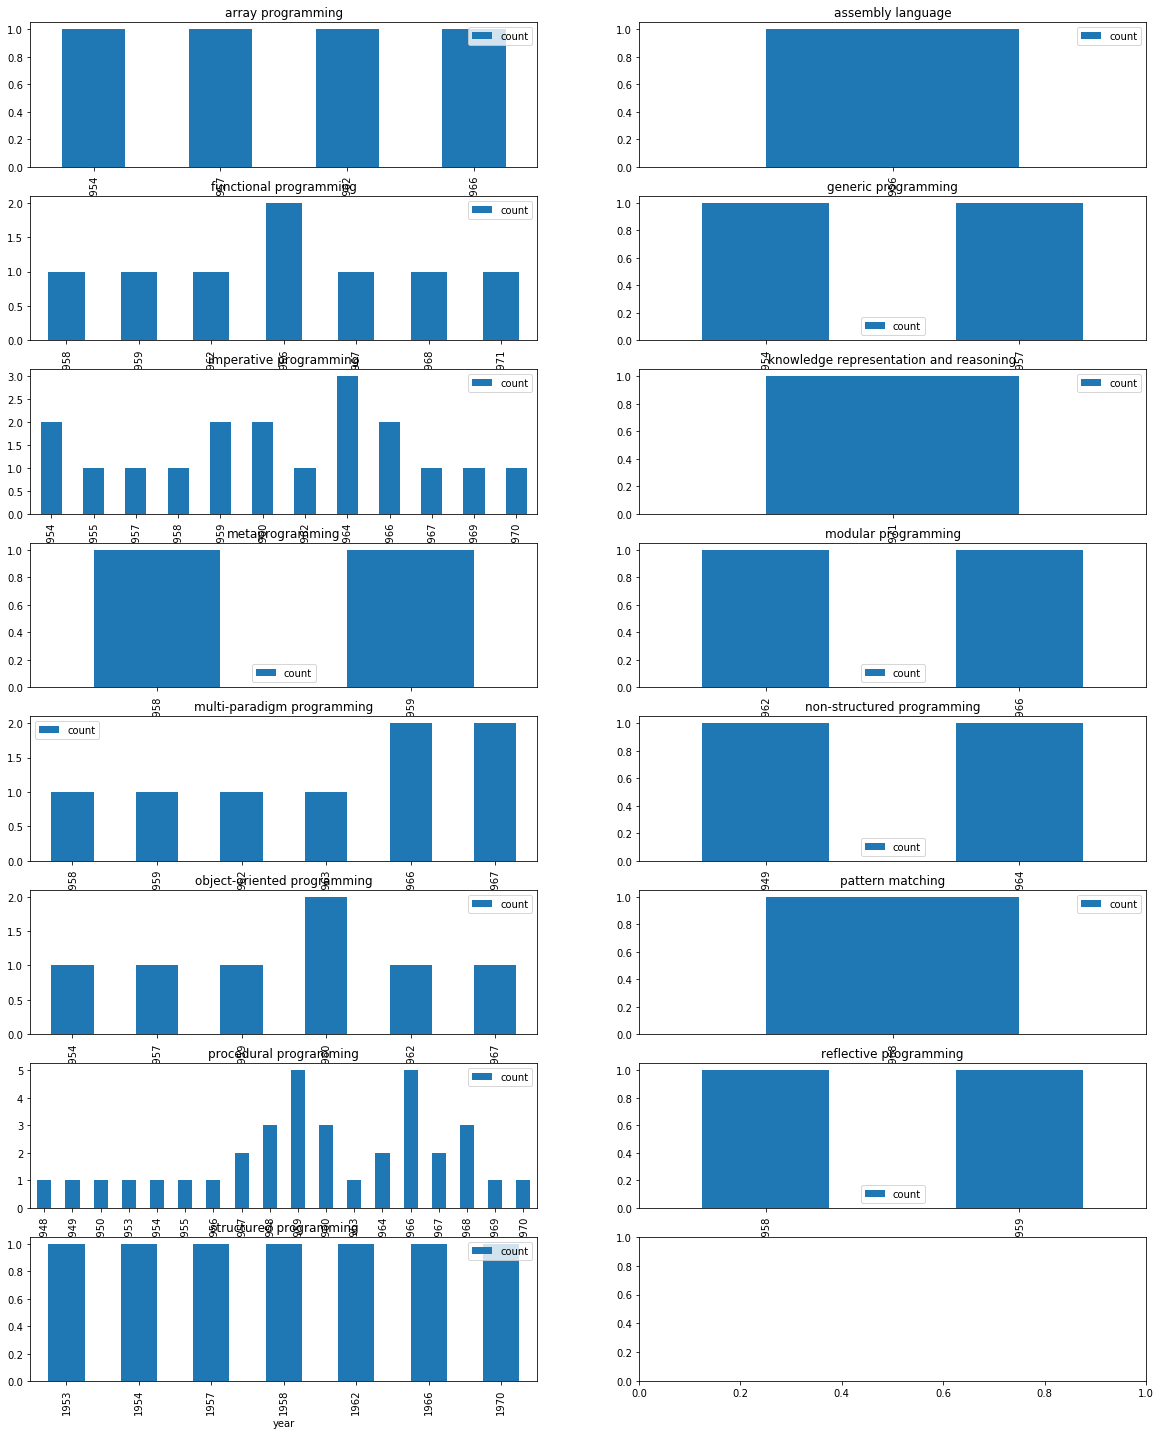

In [15]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open('plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})

grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(x='year', y='count', kind='bar', title=group, ax=axes[math.floor(i/2),i%2])

plot.show()

Make changes to the above code, so that we can get visual information on count of different programming paradigms released in every available year.

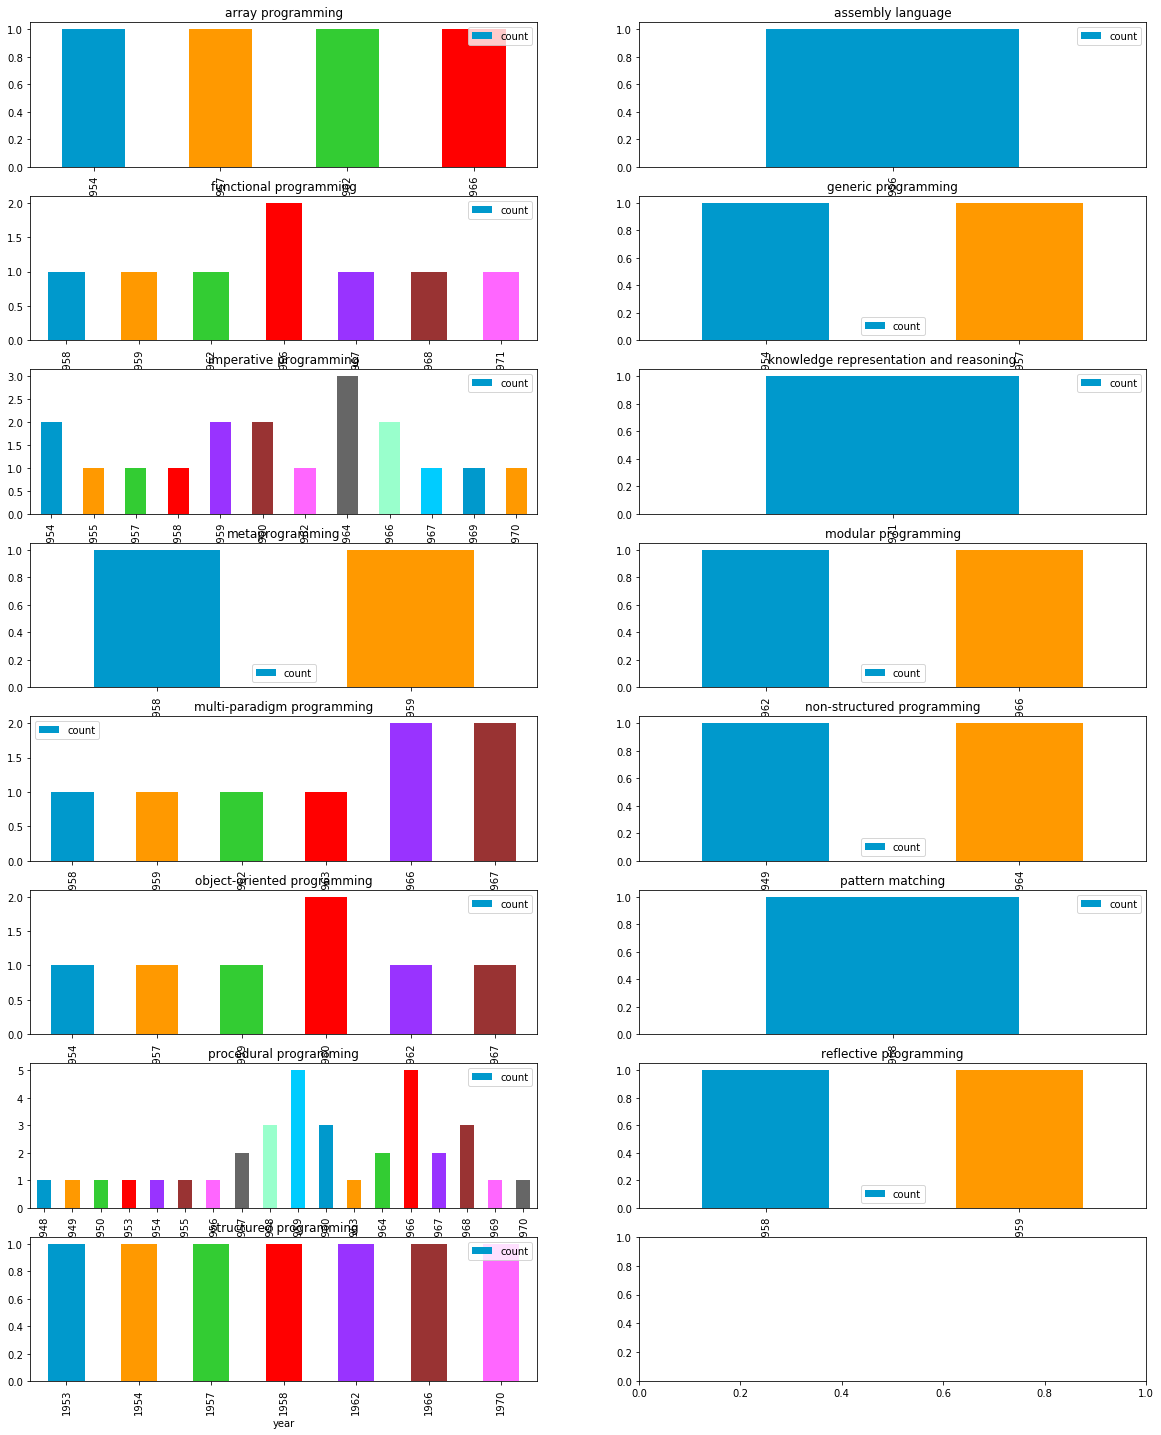

In [19]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open('plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})

grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    colors = ['#0099cc', '#ff9900', '#33cc33', '#ff0000', '#9933ff', '#993333', '#ff66ff', '#666666', '#99ffcc', '#00ccff']
    g.plot(x='year', y='count', kind='bar', title=group, ax=axes[math.floor(i/2),i%2], color=colors)

plot.show()

## Exercise 2.2

In this exercise, we will work on images. Download an image (e.g., picture.bmp and flower.jpg) in your current working folder and open it in the following manner. We will first try to get some metadata of the image.

In [24]:
import os,sys
from PIL import Image
imgfile = Image.open("picture.bmp")
print(imgfile.size, imgfile.format)

(640, 480) BMP


We use Image module of Python PIL library (Documentation). We will now try to get data of 100 pixels from an image.

In [25]:
import os,sys
from PIL import Image
imgfile = Image.open("flower.jpg")

data = imgfile.getdata()

for i in range(10):
    for j in range(10):
        print(i,j, data.getpixel((i,j)))

0 0 (102, 94, 105)
0 1 (77, 69, 82)
0 2 (77, 70, 86)
0 3 (75, 71, 86)
0 4 (75, 71, 86)
0 5 (77, 71, 85)
0 6 (78, 70, 83)
0 7 (80, 70, 81)
0 8 (78, 70, 83)
0 9 (80, 69, 83)
1 0 (78, 70, 83)
1 1 (53, 45, 58)
1 2 (53, 46, 62)
1 3 (50, 46, 61)
1 4 (53, 46, 62)
1 5 (52, 46, 60)
1 6 (53, 45, 58)
1 7 (55, 45, 56)
1 8 (55, 44, 58)
1 9 (54, 43, 57)
2 0 (76, 70, 82)
2 1 (53, 45, 60)
2 2 (53, 45, 60)
2 3 (52, 46, 60)
2 4 (53, 47, 61)
2 5 (54, 46, 59)
2 6 (55, 44, 58)
2 7 (56, 44, 58)
2 8 (54, 44, 55)
2 9 (54, 42, 54)
3 0 (78, 72, 86)
3 1 (55, 47, 62)
3 2 (56, 48, 63)
3 3 (55, 47, 60)
3 4 (56, 48, 61)
3 5 (57, 46, 60)
3 6 (56, 45, 59)
3 7 (56, 44, 58)
3 8 (54, 42, 54)
3 9 (53, 41, 53)
4 0 (80, 74, 86)
4 1 (57, 49, 62)
4 2 (57, 49, 60)
4 3 (57, 49, 60)
4 4 (59, 49, 60)
4 5 (57, 47, 56)
4 6 (56, 44, 54)
4 7 (56, 43, 53)
4 8 (54, 41, 51)
4 9 (52, 39, 49)
5 0 (82, 76, 90)
5 1 (59, 51, 64)
5 2 (61, 50, 64)
5 3 (59, 49, 60)
5 4 (58, 48, 57)
5 5 (57, 45, 55)
5 6 (55, 43, 53)
5 7 (54, 41, 51)
5 8 (53, 40,

You may notice the pixel position and pixel values (a tuple of 3 values). Let's try to get additional metadata of the images, i.e., mode of image (e.g., RGB), number of bands, number of bits for each band, width and height of image (in pixels).

In [27]:
import os,sys
from PIL import Image
imgfile = Image.open("flower.jpg")

print(imgfile.mode, imgfile.bits, imgfile.width, imgfile.height)

RGB 8 640 480


Let's now get an histogram of colors. When you execute the following code, you will get a single array of values, frequency of each band (R, G, B etc.) concatenated together. In the following code, we will assume that we are working with an image of 3 bands (RGB mode) and each band is represented by 8 bits. We will plot the histogram of different colors.

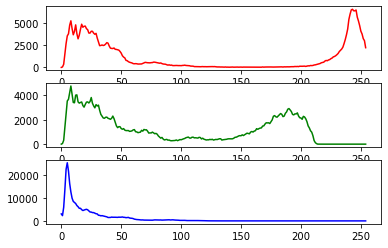

In [28]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color='red')
axis2.plot(green, color='green')
axis3.plot(blue, color='blue')
plot.show()

But if wish to see all of them in one single plot.

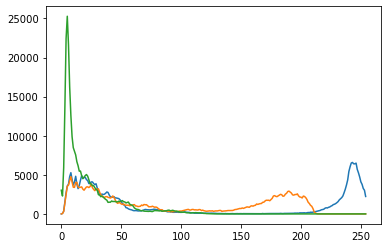

In [29]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x=range(255)

y = []
for i in x:
    y.append((red[i],green[i],blue[i]))

plot.plot(x,y)
plot.show()

But we do not wish to loose the band colors.

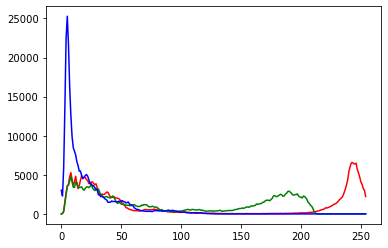

In [30]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x=range(255)

y = []
for i in x:
    y.append((red[i],green[i],blue[i]))

figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

Your next question is to get the top 20 colors in each band and create a single plot of histogram of these top colors. Write a python program that can achieve this.

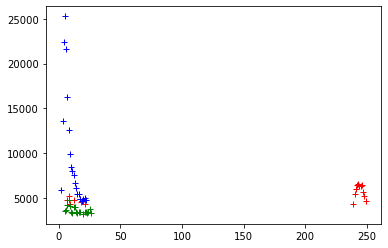

In [188]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")
histogram = imgfile.histogram()

red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

redTop = sorted(red,reverse=True)[:20]
greenTop = sorted(green,reverse=True)[:20]
blueTop = sorted(blue,reverse=True)[:20]

redY = []
redX = []
greenY = []
greenX = []
blueY = []
blueX = []

for i in range (255):
    if(red[i] in redTop):
        redY.append(red[i])
        redX.append(i)
    if(green[i] in greenTop):
        greenY.append(green[i])
        greenX.append(i)
    if(blue[i] in blueTop):
        blueY.append(blue[i])
        blueX.append(i)

figure, axes = plot.subplots()

#plot.plot(red,redY,color='red')
#plot.plot(green,greenY,color='green')
#plot.plot(blue,blueY,color='blue')

for i in range (20):
    plot.plot(redX[i], redY[i], '+', color='red')
    plot.plot(greenX[i], greenY[i], '+', color='green')
    plot.plot(blueX[i], blueY[i], '+', color='blue')
    
plot.show()

## Exercise 2.3

In this exercise, we will take a look at KMeans clustering algorithm. Continuing with images, we will now find 4 predominant colors in an image.

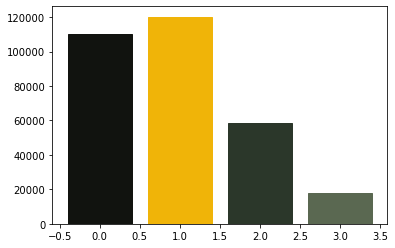

In [69]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("flower.jpg")

numarray = numpy.array(imgfile.getdata(), numpy.uint8)

clusters = KMeans(n_clusters = 4)
clusters.fit(numarray)


npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)


barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
        math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

For your next question, your goal is to understand the above code and achieve the following:

1. Assume that the number of clusters is given by the user, generalize the above code.
2. In case of bar chart, ensure that the bars are arranged in the descending order of the frequency of colors.
3. Also add support for pie chart in addition to the bar chart. Ensure that we use the image colors as the wedge colors. (e.g., given below)

How many clusters? 4
Bars or Pie chart? (B/p) p


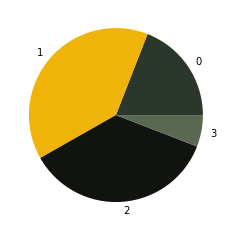

In [117]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("flower.jpg")

numarray = numpy.array(imgfile.getdata(), numpy.uint8)

nbClusters = input("How many clusters? ")
typeClusters = input("Bars or Pie chart? (B/p) ")

clusters = KMeans(n_clusters = int(nbClusters))
clusters.fit(numarray)

npbins = numpy.arange(0, int(nbClusters)+1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

if(typeClusters.lower() == 'p'):
    colors = []
    for i in range(int(nbClusters)):
        colors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
    pie = plot.pie(histogram[0],labels=labels,colors=colors)
    
else:

    barlist = plot.bar(labels, sorted(histogram[0],reverse=True))
    for i in range(int(nbClusters)):
        barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
    
    
plot.show()

## Exercice 2.4

In this exercise, we will explore Support vector machines (SVM) for classification. We will now use colors. Given a RGB number, we want to classify a number into reddish and non-reddish colors.

In [116]:
from sklearn import svm
x = [[186, 0, 13], [255, 121, 97], [244, 67, 54],[69, 39, 160],[121, 83, 210],[0, 51, 0],[27, 94, 32]]
y = [1,1,1,0,0,0,0]
clf = svm.SVC()
clf.fit(x, y)

print(clf.predict([[186, 0, 13]]))
print(clf.predict([[30, 136, 229]]))

[1]
[0]


Look at the training data (x,y). We first use the data to train our classifier. Then we try to predict a new color. We first try with one element of our training data and later with a new color.

Your next goal is to achieve multi-class classification.

1. Train a classifier that can classify three colors: reddish, bluish and greenish colors.
2. Test your classifier with new colors.
3. What are your observations?

In [150]:
from sklearn import svm

#rgb
x = [[186, 0, 13], [255, 121, 97], [244, 67, 54],[69, 39, 160],[121, 83, 210],[0, 51, 0],[27, 94, 32],[255, 0, 0],[0, 255, 0],[0, 0, 255]]

y = [0,0,0,2,2,1,1,0,1,2]

clf = svm.SVC()
clf.fit(x, y)

testColors = [[186, 0, 13],[244, 100, 130],[47, 20, 0],[24, 120, 103],[255, 44, 13],
              [0, 14, 130],[144, 144, 255],[50, 50, 50],[0, 0, 13],[0, 20, 40]]

for i in range (len(testColors)):
    print(testColors[i],end=" ")
    
    prediction = clf.predict([testColors[i]])

    if(prediction == 0):
        color = 'reddish'
    elif(prediction == 1):
        color = 'greenish'
    elif(prediction == 2):
        color = 'bluish'
    else:
        color = 'unknown'
    print(color)
print()

[186, 0, 13] reddish
[244, 100, 130] reddish
[47, 20, 0] greenish
[24, 120, 103] greenish
[255, 44, 13] reddish
[0, 14, 130] bluish
[144, 144, 255] bluish
[50, 50, 50] greenish
[0, 0, 13] greenish
[0, 20, 40] greenish



Needs a lot of data to work correctly.

The more there is, the more it is accurate

## new 2.4

Let's start with some very simple exercises to experiment with the KMeans algorithm. Consider the following data and visualize it
on a using a scatter plot.

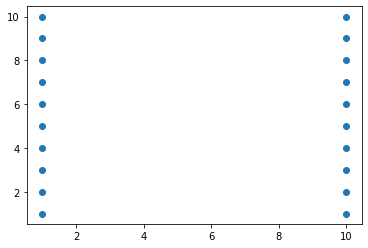

In [4]:
import numpy as np
import matplotlib.pyplot as plot
numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5],
[1, 6], [1, 7], [1, 8],[1, 9], [1, 10],
[10, 1], [10, 2], [10, 3], [10, 4], [10, 5],
[10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

Visually, it is quite evident that there are two clusters. But let's use KMeans algorithm to obtain the 2 clusters. We will first see the
labels of our clustered data.

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
[1, 6], [1, 7], [1, 8],[1, 9], [1, 10],
[10, 1], [10, 2], [10, 3], [10, 4], [10, 5],
[10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


Now, we will visualize the clusters using a scatter plot. We will use two colors for visually distinguishing them

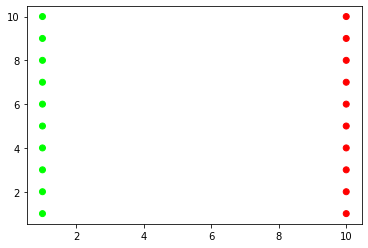

In [5]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5],
[1, 6], [1, 7], [1, 8],[1, 9], [1, 10],
[10, 1], [10, 2], [10, 3], [10, 4], [10, 5],
[10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

What if we tried to obtain 4 clusters? Try running the following code, multiple times. Any observation? Try changing the value of
n_init with higher values.

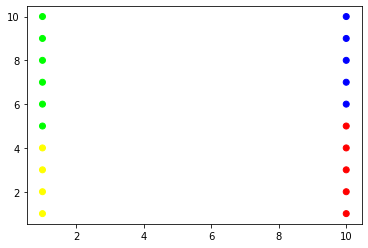

In [12]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5],
[1, 6], [1, 7], [1, 8],[1, 9], [1, 10],
[10, 1], [10, 2], [10, 3], [10, 4], [10, 5],
[10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
clusters = KMeans(n_clusters = 4, n_init=6)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Now we will try obtaining clusters with some real data (reference: citypopulation.json, Source: Wikidata). It contains information
concerning different cities of the world: city name, year of its foundation and its population in the year 2010. In the following code,
we want to cluster population data and to observe whether there is any correlation between age and recent population (2010)
statistics. In the following code, there is a commented line. You can un-comment it to try with different population numbers. Any
observation? Why did we use LabelEncoder? What is its purpose?

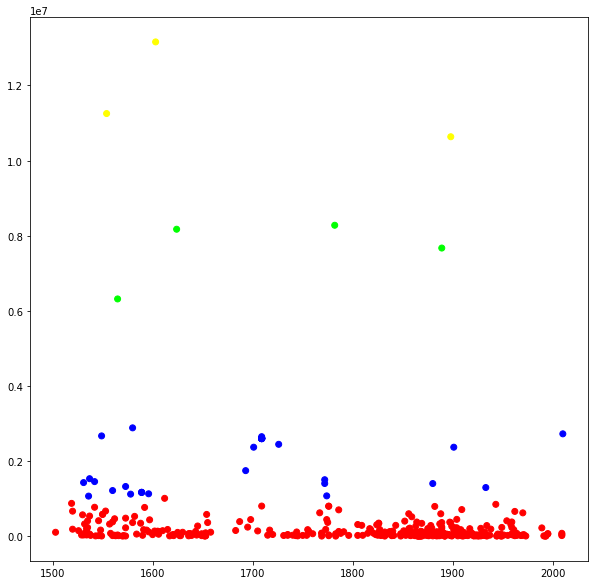

In [23]:
import json

from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder

data = json.load(open('citypopulation.json', 'rb'))
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[['year', 'population']]
clusters = KMeans(n_clusters=4, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams['figure.figsize'] = [10, 10]
plot.scatter(yearPopulation['year'], yearPopulation['population'],
             c=colors[clusters.labels_])
plot.show()


Now let's continue working with flower.jpg. Let's start once again with KMeans and try to get clusters of size between 2 and 11.

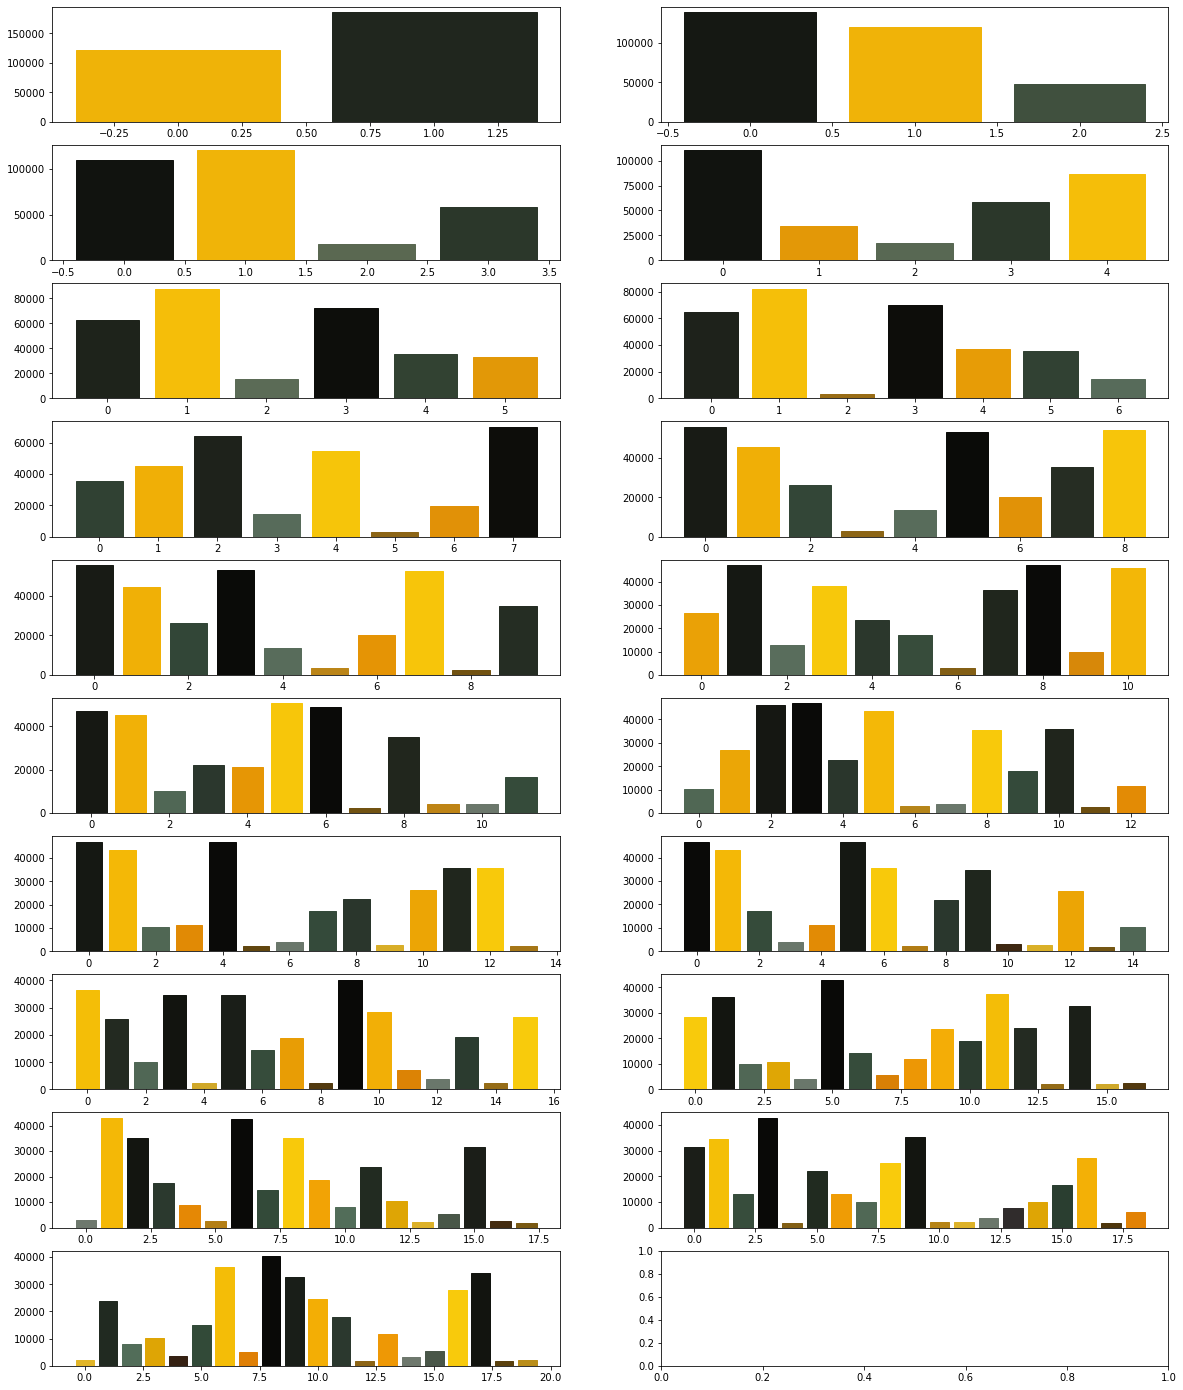

In [3]:
import math

import matplotlib.pyplot as plot
import numpy
from PIL import Image
from sklearn.cluster import KMeans

imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=10, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 22):
    cluster_count = x
    
    clusters = KMeans(n_clusters=cluster_count)
    clusters.fit(numarray)
    
    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if (yaxis == 0):
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
                                                math.ceil(clusters.cluster_centers_[i][1]),
                                                math.ceil(clusters.cluster_centers_[i][2])))
plot.show()


Now we modify the above algorithm to use MiniBatchKMeans clustering algorithm (refer here). Observe the changes.

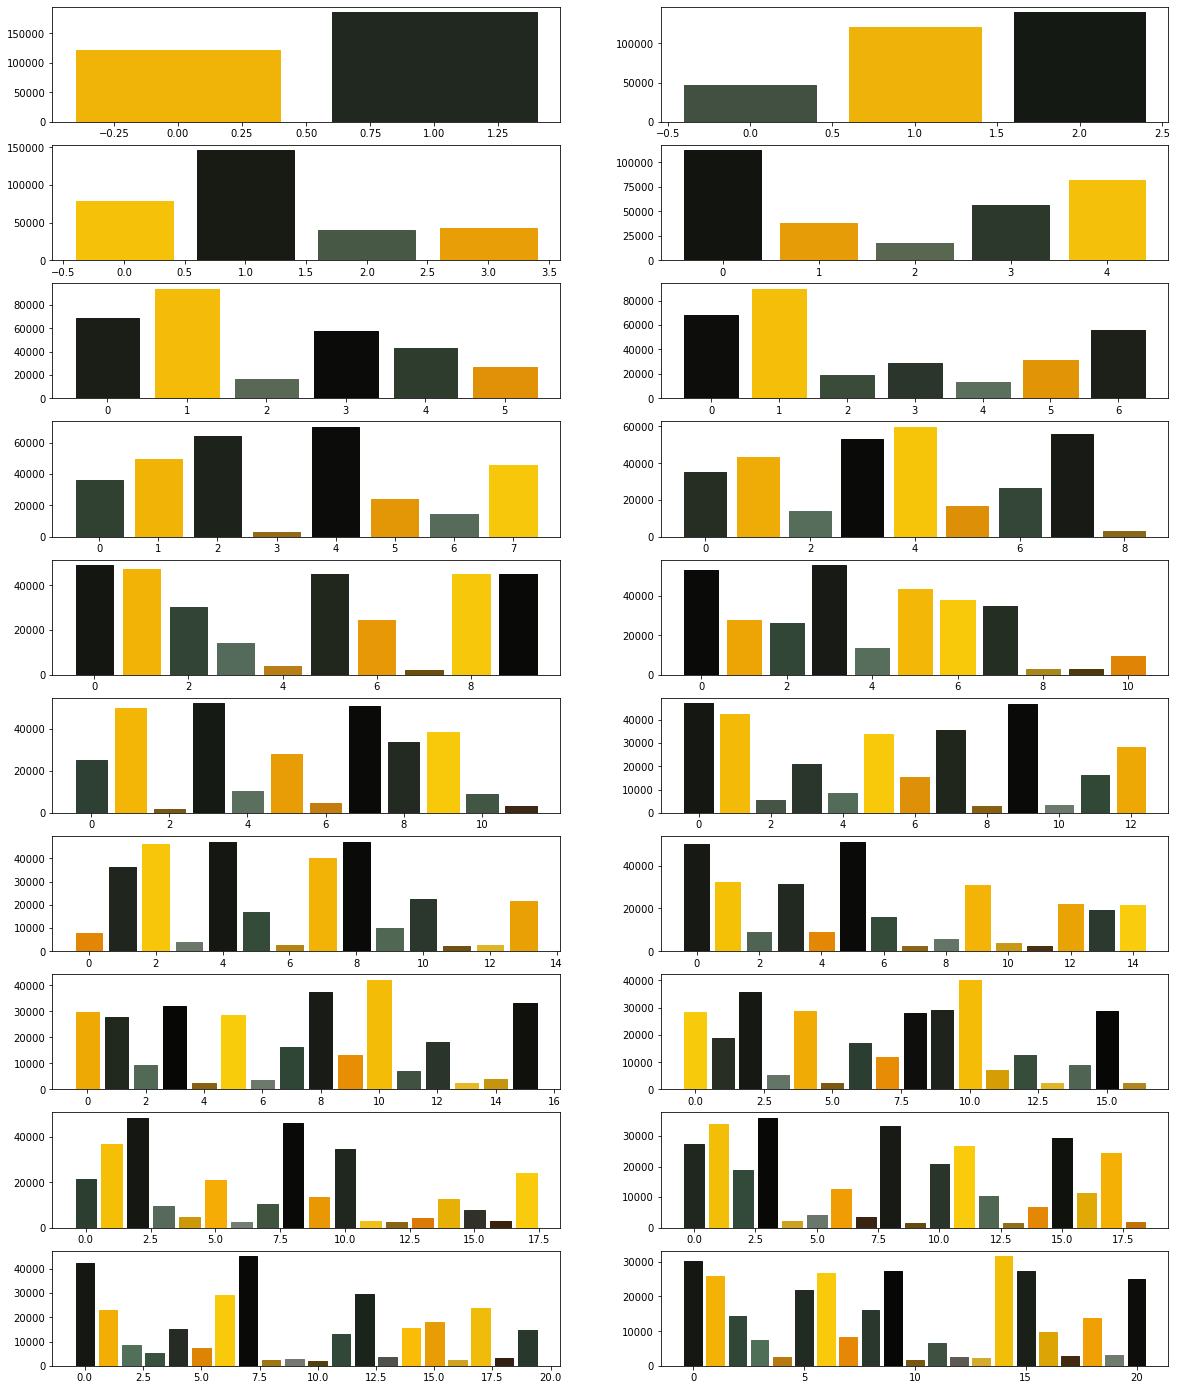

In [4]:
import math

import matplotlib.pyplot as plot
import numpy
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=10, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 22):
    cluster_count = x
    clusters = MiniBatchKMeans(n_clusters=cluster_count)
    clusters.fit(numarray)
    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if (yaxis == 0):
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
                                                math.ceil(clusters.cluster_centers_[i][1]),
                                                math.ceil(clusters.cluster_centers_[i][2])))
plot.show()


The difference is that in mini-batch k-means the most computationally costly step is conducted on only a random sample of observations as opposed to all observations.

In order to compare the two algorithms, we consider the time taken by each of these algorithms. We will repeat the above
experiment, but this time we will plot the time taken to obtain clusters of different sizes.
We start with KMeans.

Total time:  1 : 0.5739998817443848
Total time:  2 : 0.7530004978179932
Total time:  3 : 1.6000547409057617
Total time:  4 : 2.2611443996429443
Total time:  5 : 4.358193635940552
Total time:  6 : 4.5089943408966064
Total time:  7 : 6.375001430511475
Total time:  8 : 7.866039514541626
Total time:  9 : 7.591880559921265
Total time:  10 : 9.604904174804688
Total time:  11 : 9.61136245727539
Total time:  12 : 15.70556092262268
Total time:  13 : 13.133412599563599
Total time:  14 : 15.447478771209717
Total time:  15 : 22.744415760040283
Total time:  16 : 17.91504216194153
Total time:  17 : 19.01876139640808
Total time:  18 : 27.633906602859497
Total time:  19 : 26.2058584690094


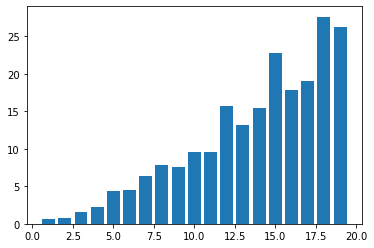

In [5]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
 cluster_count = x
 start_time = time.time()
 clusters = KMeans(n_clusters = cluster_count)
 clusters.fit(numarray)
 end_time = time.time()
 total_time = end_time - start_time
 print("Total time: ", x, ":", total_time)
 X.append(x)
 Y.append(total_time)
plot.bar(X, Y)
plot.show()

We now use MiniBatchKMeans.

Total time:  1 : 0.7879106998443604
Total time:  2 : 0.8180022239685059
Total time:  3 : 0.833000898361206
Total time:  4 : 0.8079662322998047
Total time:  5 : 0.8400640487670898
Total time:  6 : 0.8331472873687744
Total time:  7 : 0.835965633392334
Total time:  8 : 0.8650925159454346
Total time:  9 : 0.8429999351501465
Total time:  10 : 0.836188554763794
Total time:  11 : 2.360705852508545
Total time:  12 : 0.845036506652832
Total time:  13 : 0.8309645652770996
Total time:  14 : 1.0209999084472656
Total time:  15 : 0.8610360622406006
Total time:  16 : 2.2149641513824463
Total time:  17 : 1.3709995746612549
Total time:  18 : 0.8500299453735352
Total time:  19 : 1.2927236557006836
Total time:  20 : 2.6660189628601074
Total time:  21 : 0.8990151882171631
Total time:  22 : 0.8830490112304688
Total time:  23 : 0.8699641227722168
Total time:  24 : 0.9420309066772461
Total time:  25 : 0.9019985198974609
Total time:  26 : 0.8890378475189209
Total time:  27 : 1.863055944442749
Total time:  28 

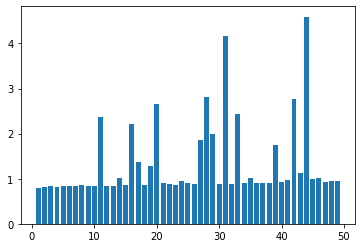

In [6]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 50):
 cluster_count = x
 start_time = time.time()
 clusters = MiniBatchKMeans(n_clusters = cluster_count)
 clusters.fit(numarray)
 end_time = time.time()
 total_time = end_time - start_time
 print("Total time: ", x, ":", total_time)
 X.append(x)
 Y.append(total_time)
plot.bar(X, Y)
plot.show()

Now test the above code using MiniBatchKMeans algorithm with cluster sizes between 2 and 50. What are your observations? 

Finally we want to see whether we get the same cluster centers from both the algorithms. Run the following program to see the
cluster centers produced by the two algorithms. We use two different colors (red and black) to distinguish the cluster centers
from the two algorithms.

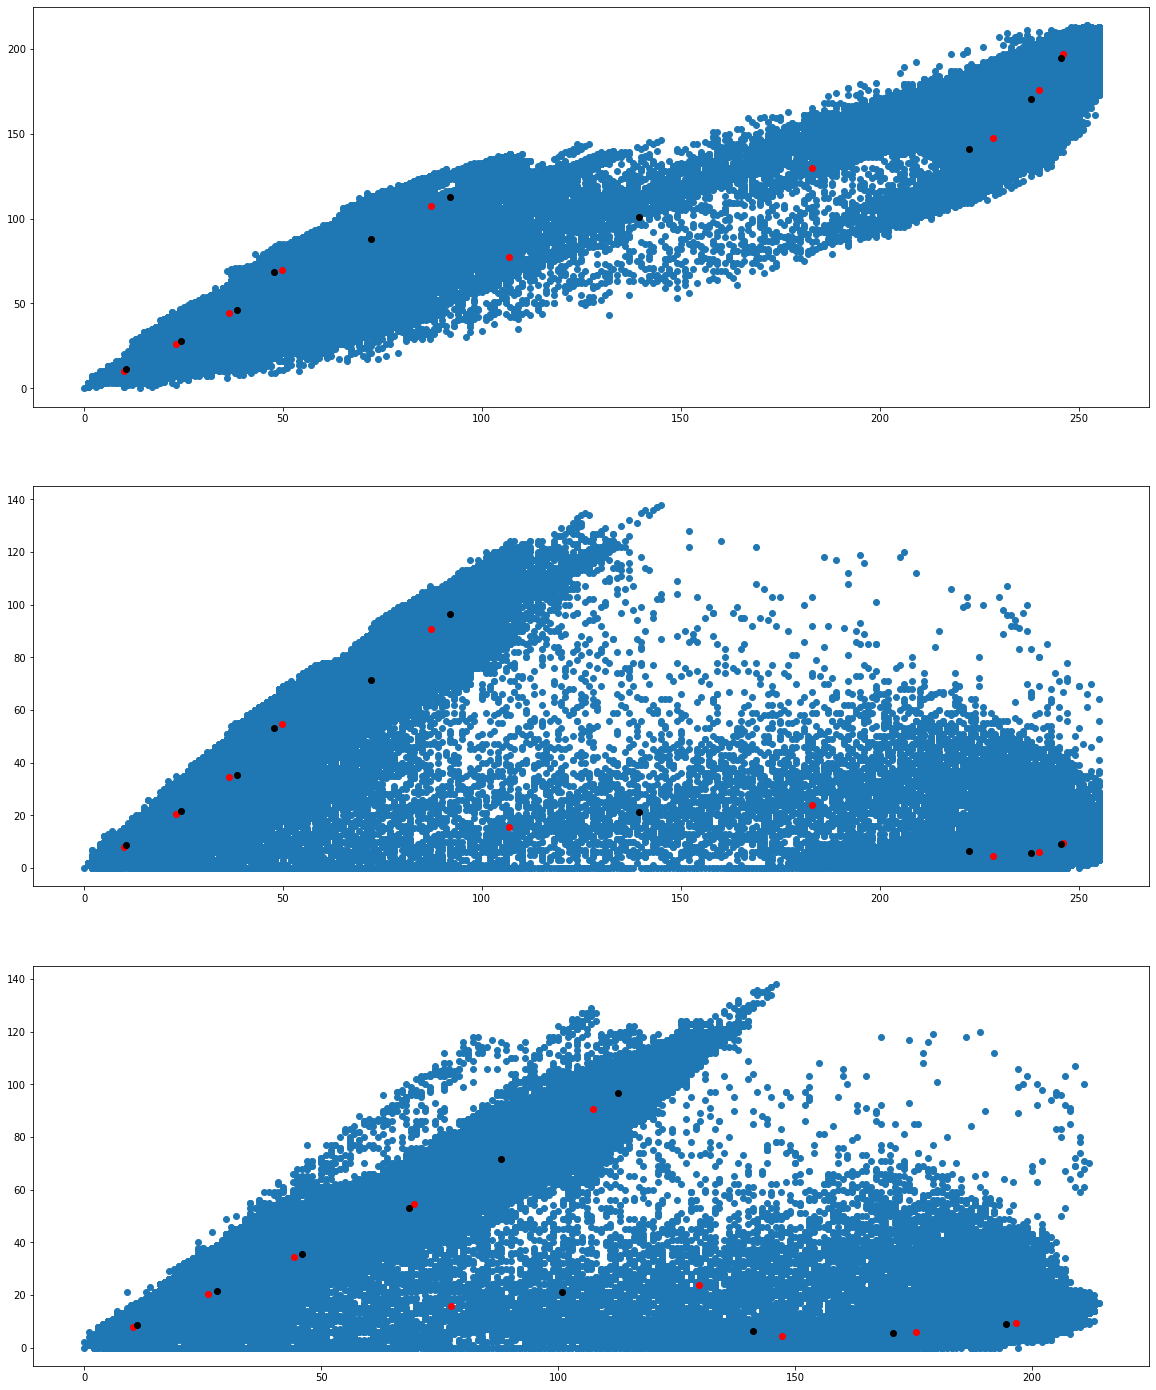

In [7]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
cluster_count = 10
clusters = KMeans(n_clusters = cluster_count)
clusters.fit(numarray)
mclusters = MiniBatchKMeans(n_clusters = cluster_count)
mclusters.fit(numarray)
fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20,25))
#Scatter plot for RG (RGB)
axes[0].scatter(numarray[:,0],numarray[:,1])
axes[0].scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], c='red')
axes[0].scatter(mclusters.cluster_centers_[:,0], mclusters.cluster_centers_[:,1], c='black')
#Scatter plot of RB (RGB)
axes[1].scatter(numarray[:,0],numarray[:,2])
axes[1].scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,2], c='red')
axes[1].scatter(mclusters.cluster_centers_[:,0], mclusters.cluster_centers_[:,2], c='black')
#Scatter plot of GB (RGB)
axes[2].scatter(numarray[:,1],numarray[:,2])
axes[2].scatter(clusters.cluster_centers_[:,1], clusters.cluster_centers_[:,2], c='red')
axes[2].scatter(mclusters.cluster_centers_[:,1], mclusters.cluster_centers_[:,2], c='black')

We would like to see how the individual pixel values have been clustered. Run the following program a couple of times.

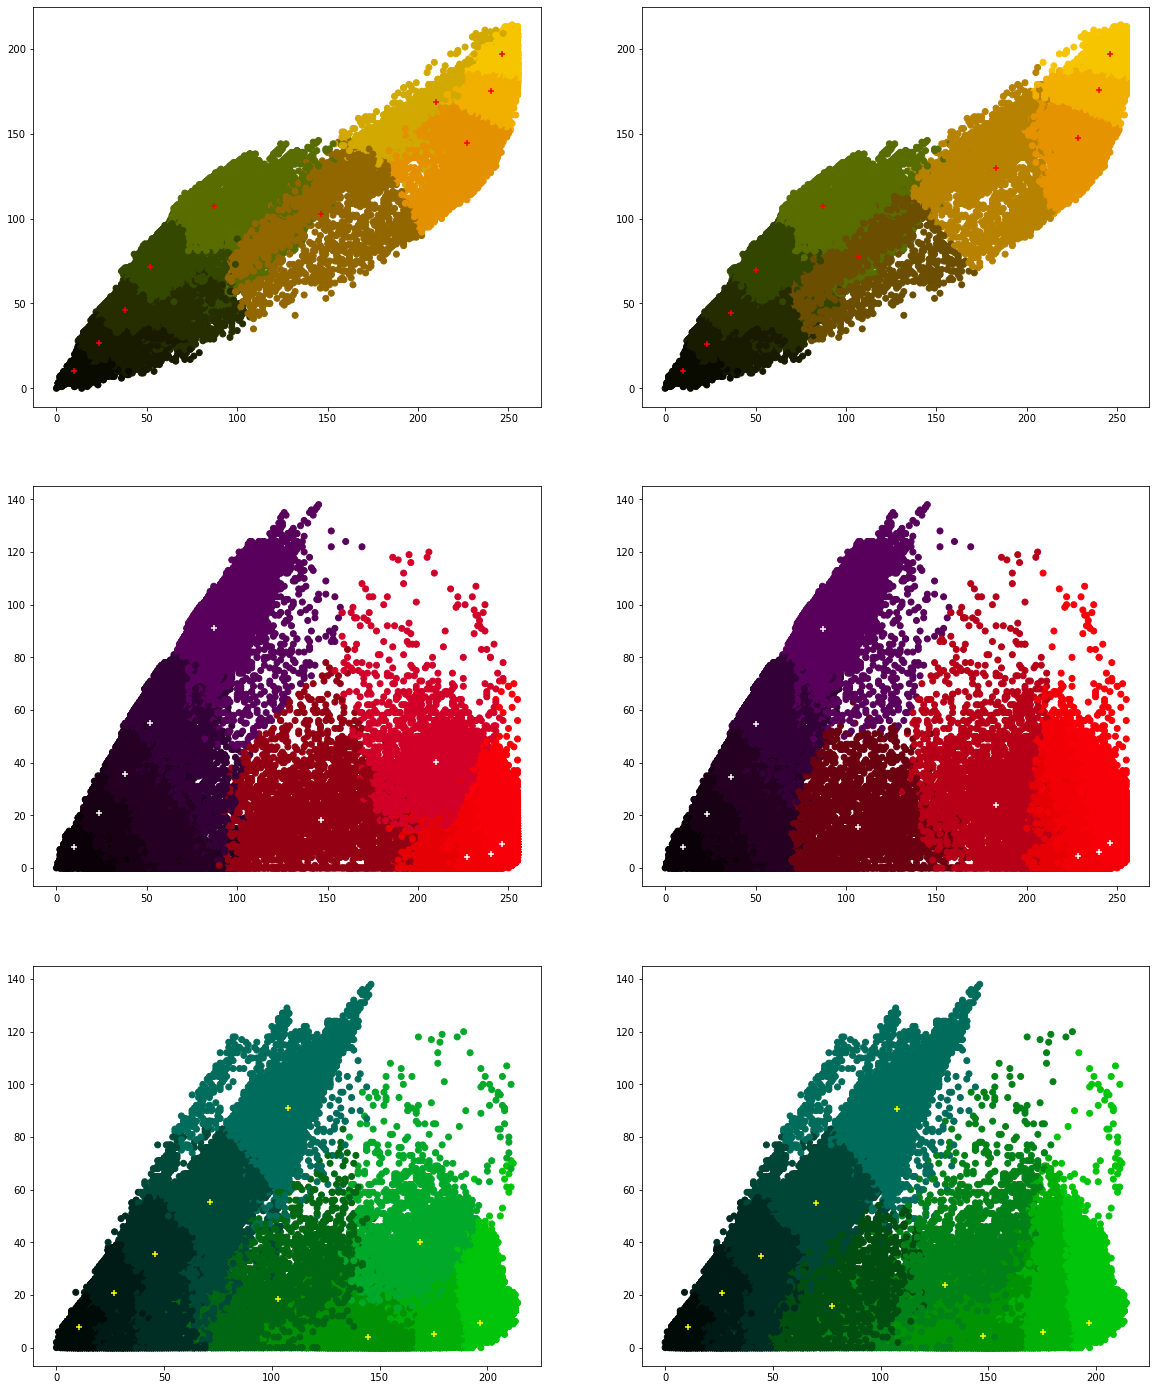

In [8]:
import math

import matplotlib.pyplot as plot
import numpy
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
cluster_count = 10
mclusters = MiniBatchKMeans(n_clusters=cluster_count)
mclusters.fit(numarray)
npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)
fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))
# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (math.ceil(mclusters.cluster_centers_[j][0]),
                                     math.ceil(mclusters.cluster_centers_[j][1]), 0))
axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], marker="+",
                   c='red')
# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (math.ceil(mclusters.cluster_centers_[j][0]),
                                     0, math.ceil(mclusters.cluster_centers_[j][2])))
axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], marker="+",
                   c='white')
# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (0, math.ceil(mclusters.cluster_centers_[j][1]),
                                     math.ceil(mclusters.cluster_centers_[j][2])))
axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], marker="+",
                   c='yellow')
clusters = KMeans(n_clusters=cluster_count)
clusters.fit(numarray)
npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[j][0]),
                                     math.ceil(clusters.cluster_centers_[j][1]), 0))
axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], marker="+",
                   c='red')
# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[j][0]),
                                     0, math.ceil(clusters.cluster_centers_[j][2])))
axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], marker="+",
                   c='white')
# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (0, math.ceil(clusters.cluster_centers_[j][1]),
                                     math.ceil(clusters.cluster_centers_[j][2])))
axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], marker="+",
                   c='yellow')
plot.show()


What are your conclusions?

MiniBatchKMeans - quick but inconsistent results, since each run the samples being worked on are randomly selected.

KMeans - SLOW but way more consistent results.

## Exercise 2.5: Project

### Project: Image recommender system: 3 practical sessions
The goal of this project is to recommend images based on the color preferences of the user. We will build this system in three practical sessions.

We have to collect the following data.

#### 1. A set of images and the predominant colors in each image

building user preference profiles

In [4]:
from PIL import Image, ExifTags
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import json

# imgsources = ["testimages/ressource (1).jpg", "testimages/ressource (100).jpg", "testimages/ressource (101).jpg", "testimages/ressource (102).jpg", "testimages/ressource (103).jpg", "testimages/ressource (104).jpg", "testimages/ressource (105).jpg", "testimages/ressource (106).jpg", "testimages/ressource (107).jpg", "testimages/ressource (108).jpg", "testimages/ressource (109).jpg", "testimages/ressource (110).jpg", "testimages/ressource (111).jpg", "testimages/ressource (112).jpg", "testimages/ressource (113).jpg", "testimages/ressource (114).jpg", "testimages/ressource (115).jpg", "testimages/ressource (116).jpg", "testimages/ressource (117).jpg", "testimages/ressource (118).jpg", "testimages/ressource (119).jpg", "testimages/ressource (120).jpg", "testimages/ressource (121).jpg", "testimages/ressource (122).jpg", "testimages/ressource (123).jpg", "testimages/ressource (124).jpg", "testimages/ressource (125).jpg", "testimages/ressource (126).jpg", "testimages/ressource (127).jpg", "testimages/ressource (128).jpg", "testimages/ressource (129).jpg", "testimages/ressource (130).jpg", "testimages/ressource (131).jpg", "testimages/ressource (132).jpg", "testimages/ressource (133).jpg", "testimages/ressource (134).jpg", "testimages/ressource (135).jpg", "testimages/ressource (136).jpg", "testimages/ressource (137).jpg", "testimages/ressource (138).jpg", "testimages/ressource (139).jpg", "testimages/ressource (140).jpg", "testimages/ressource (141).jpg", "testimages/ressource (142).jpg", "testimages/ressource (143).jpg", "testimages/ressource (144).jpg", "testimages/ressource (145).jpg", "testimages/ressource (146).jpg", "testimages/ressource (147).jpg", "testimages/ressource (148).jpg", "testimages/ressource (149).jpg", "testimages/ressource (150).jpg", "testimages/ressource (151).jpg", "testimages/ressource (152).jpg", "testimages/ressource (153).jpg", "testimages/ressource (154).jpg", "testimages/ressource (2).jpg", "testimages/ressource (2).png", "testimages/ressource (3).jpg", "testimages/ressource (3).png", "testimages/ressource (4).PNG", "testimages/ressource (5).PNG", "testimages/ressource (6).PNG", "testimages/ressource (73).jpg", "testimages/ressource (74).jpg", "testimages/ressource (75).jpg", "testimages/ressource (76).jpg", "testimages/ressource (77).jpg", "testimages/ressource (78).jpg", "testimages/ressource (79).jpg", "testimages/ressource (80).jpg", "testimages/ressource (81).jpg", "testimages/ressource (82).jpg", "testimages/ressource (83).jpg", "testimages/ressource (84).jpg", "testimages/ressource (85).jpg", "testimages/ressource (86).jpg", "testimages/ressource (87).jpg", "testimages/ressource (88).jpg", "testimages/ressource (89).jpg", "testimages/ressource (90).jpg", "testimages/ressource (91).jpg", "testimages/ressource (92).jpg", "testimages/ressource (93).jpg", "testimages/ressource (94).jpg", "testimages/ressource (95).jpg", "testimages/ressource (96).jpg", "testimages/ressource (97).jpg", "testimages/ressource (98).jpg", "testimages/ressource (99).jpg"]
imgsources = ["testimages/ressource (1).jpg", "testimages/ressource (100).jpg"]

images = dict()
predColors = []

for img in imgsources:
    images[img] = Image.open(img)


for i in range (len(images.values())):
    numarray = numpy.array(list(images.values())[i].getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = 1)
    clusters.fit(numarray)
    predColors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[0][0]),
            math.ceil(clusters.cluster_centers_[0][1]), math.ceil(clusters.cluster_centers_[0][2])))

i=0
arr = []

# gen array
for key, value in images.items():
    a = dict()
    a["path"] = str(key)
    a["color"] = str(predColors[i])
    a["size"] = str(value.size)
    a["format"] = str(value.format)
    a["tags"] = []
    # handle tag addition
    tagscondition = input("would you like to add tags for " + str(key) + " ? y/N ")
    if tagscondition.lower() in ("y", "yes"):
        done = False
        while not done:
            print("current tags of {} : {}".format(str(key), str(a["tags"])))
            newTag = input("add image tag or 'end' ? (enter xx to pop last tag) ")

            if(newTag.lower() == "end"):
                done = True
            elif newTag.lower() == "xx":
                print("last tag element deleted")
                a["tags"].pop()
            else:
                a["tags"].append(newTag.lower())
    
    arr.append(a)
    i += 1
    
# write json array to file
savefilename = input("enter save file name : ") or "default"
f = open(str(savefilename) + ".json", "w+")
f.write(json.dumps(arr))
json.dumps(arr)

would you like to add tags for testimages/ressource (1).jpg ? y/N 
would you like to add tags for testimages/ressource (100).jpg ? y/N *
enter save file name : tmpsave


'[{"path": "testimages/ressource (1).jpg", "color": "#976e48", "size": "(500, 375)", "format": "JPEG", "tags": [], "exif": {"ExifOffset": 26}}, {"path": "testimages/ressource (100).jpg", "color": "#80857a", "size": "(500, 333)", "format": "JPEG", "tags": [], "exif": {"ExifOffset": 26}}]'

### 2. Ask the user to select some images. We assume that the chosen images contain the favourite colors of the user.

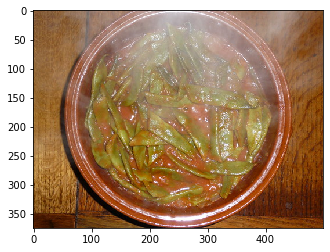

Do you like this image? Y/n y


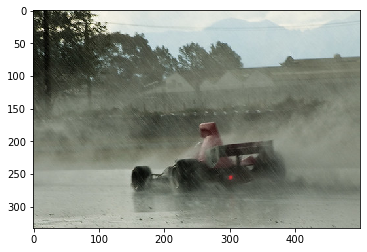

Do you like this image? Y/n n
[[0], [1]]
[1, 0]
0 testimages/ressource (126).jpg [1]
1 testimages/ressource (127).jpg [0]
2 testimages/ressource (128).jpg [0]
3 testimages/ressource (129).jpg [0]
4 testimages/ressource (130).jpg [0]
5 testimages/ressource (131).jpg [0]
6 testimages/ressource (132).jpg [0]
7 testimages/ressource (133).jpg [0]
8 testimages/ressource (134).jpg [0]
9 testimages/ressource (135).jpg [0]
10 testimages/ressource (136).jpg [0]
11 testimages/ressource (137).jpg [0]
12 testimages/ressource (138).jpg [0]
13 testimages/ressource (139).jpg [0]
14 testimages/ressource (140).jpg [0]
15 testimages/ressource (141).jpg [1]


In [27]:
from PIL import Image
import numpy
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn import svm
    

"""
while not done:
    imgName = input("Image name or end? ")
    
    if(imgName.lower() == "end"):
        done = True
    else:
        images.append(Image.open(imgName))
    
for i in range (len(images)):
    numarray = numpy.array(images[i].getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = 1)
    clusters.fit(numarray)
    predColors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[0][0]),
            math.ceil(clusters.cluster_centers_[0][1]), math.ceil(clusters.cluster_centers_[0][2])))

for i in range (len(images)):
    print(str(i) + ": " + str(predColors[i]))
"""

imgsources = ["testimages/ressource (1).jpg", "testimages/ressource (100).jpg", "testimages/ressource (101).jpg", "testimages/ressource (102).jpg", "testimages/ressource (103).jpg", "testimages/ressource (104).jpg", "testimages/ressource (105).jpg"]
images = dict()

imgsource2 = ["testimages/ressource (126).jpg", "testimages/ressource (127).jpg", "testimages/ressource (128).jpg", "testimages/ressource (129).jpg", "testimages/ressource (130).jpg", "testimages/ressource (131).jpg", "testimages/ressource (132).jpg", "testimages/ressource (133).jpg", "testimages/ressource (134).jpg", "testimages/ressource (135).jpg", "testimages/ressource (136).jpg", "testimages/ressource (137).jpg", "testimages/ressource (138).jpg", "testimages/ressource (139).jpg", "testimages/ressource (140).jpg", "testimages/ressource (141).jpg"]
images2 = dict()

for img in imgsources:
    images[img] = Image.open(img)
    


nbImages = 1
done = False
nbLiked = 0
nbNotLiked = 0

x = []
y = []

i = 0

while not done:
    
    imgPath = list(images.keys())[i]
    
    img=mpimg.imread(imgPath)
    imgplot = plot.imshow(img)
    plot.show()
    
    x.append([i,])
    
    imageStatus = input("Do you like this image? Y/n ")
    if imageStatus.lower() in ("n", "no"):
        # add image to not liked
        y.append(0)
        nbNotLiked += 1
    else:
        # add image to liked
        y.append(1)
        nbLiked += 1
    
    if(nbLiked >= nbImages and nbNotLiked >= nbImages):
        done = True
        
    i += 1
    
print(str(x))
print(str(y))
    
clf = svm.SVC()
clf.fit(x, y)

i = 0

for img in imgsource2:
    prediction = clf.predict([[i,]])
    print(str(i) + " " + str(img) + " " + str(prediction))
    i += 1


### 3. We analyse user color-preferences and predominant colors of available images to propose new images to the user.

Image name or end? garfled.jpg
Image name or end? end
0: #99712f
